### Signal Detection and Decoding

Here we mathematize the problem of a downstream "readout" or neuron either detecting the presence of a signal or decoding an input value from noise. As we show, decoding improves when averaging together multiple identical neurons. One thing we will not show, but is very interesting, is the fact that often one can do even better when decoding from multiple neurons that all respond differently to the same stimulus.

**Poisson spiking:** As discussed in class, we can consider a single neuron that spikes as a Poisson process with rate $\nu_0$ when a signal of interest is not present ($s_0$) and rate $\nu_1>\nu_0$ when the signal is present ($s_1$). We will assume the neuron is observed for a single time unit, so the rates are the only model parameters:
$$
P(k|s_1) = \frac{\nu_1^k}{k!} {\rm e}^{- \nu_1}, \ \ \ \ \ \ P(k|s_0) = \frac{\nu_0^k}{k!} {\rm e}^{- \nu_0},
$$
so given some observation $k$, how well can we infer whether or not a stimulus is present?

The classic approach is to compute and threshold the likelihood ratio (or log likelihood ratio) using Bayes' rule:
$$
R_k = \frac{P(s_1|k)}{P(s_0|k)} = \frac{P(k|s_1) P(s_1)}{P(k|s_0) P(s_0)} = \left( \frac{\nu_1}{\nu_0} \right)^k {\rm e}^{-(\nu_1 - \nu_0)} \frac{P(s_1)}{P(s_0)},
$$
which since $\nu_1>\nu_0$ will be large if $k$ is large and small if $k$ is small. Since the neuron has a higher (lower) Poisson rate when the signal is present (absent), this suggests thresholding $R_k$ at $\theta$ and concluding the signal was present (absent) if $R_k>\theta$ ($R_k < \theta$).

Equivalently, we can consider the log likelihood ratio (LLR) and find
$$
LLR_k = \log R_k = k \log \frac{\nu_1}{\nu_0} - (\nu_1 - \nu_0) + \log \frac{P(s_1)}{P(s_0)}
$$
and threshold $LLR_k$ or equivalently the number of spikes $k$. If $k \geq k_{\rm th}$ ($k < k_{\rm th}$), conclude $s_1$ ($s_0$). How to set $k_{\rm th}$ or equivalently $\theta$? It turns out to be best to pick the option of higher probability. Note, $s_1$ ($s_0$) has higher probability if $R_k > 1$ ($R_k < 1$) -- Do you see why? This is equivalent to setting
$$
k_{\rm th} = \frac{(\nu_1 - \nu_0) - \log (P(s_1)/P(s_0))}{\log (\nu_1/\nu_0)},
$$
which results in two types of errors: false alarms and misses. False alarms arise in concluding the signal is present when it is not:
$$
P_{\rm FA} = \sum_{k \geq k_{\rm th}} \frac{\nu_0^k}{k!} {\rm e}^{- \nu_1}
$$
whereas the probability of not missing (or correctly detecting) is
$$
P_{\rm D} = \sum_{k \geq k_{\rm th}} \frac{\nu_1^k}{k!} {\rm e}^{- \nu_0}.
$$
Below we have a python script for generating both plots of the distribution of spikes of an example case with different spike rates for signal present/absent and the receiver operated characteristic (ROC) curve showing $P_{\rm D}$ plotted against $P_{\rm FA}$ as $k_{\rm th}$ is varied. We take $\nu_0 = 2$, $\nu_1 = 4$, and $P(s_0) = P(s_1) = 1/2$.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


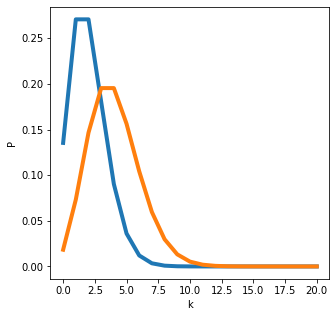

In [16]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import math

k = list(range(0,21))
nu0 = 2
nu1 = 4
P0 = np.zeros(21)
P1 = np.zeros(21)
for j in np.arange(20):
    P0[j] = nu0**j*np.exp(-nu0)/math.factorial(j)
    P1[j] = nu1**j*np.exp(-nu1)/math.factorial(j)
    
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(k,P0,linewidth=4.0)  # plot command with vectors as arguments
plt.plot(k,P1,linewidth=4.0)
plt.xlabel('k')         # label for x-axis
plt.ylabel('P')      # label for y-axis
plt.show()    

Above shows the Poisson distributions for signal absent (blue) and present (orange). Now we compute the probability of false alarms and correct detection for each possible spike threshold.

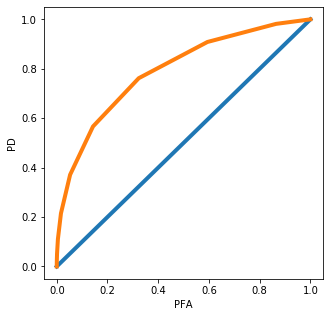

In [17]:
PFA = np.zeros(21)
PD = np.zeros(21)
for j in np.arange(20):
    for m in range(j,20):
        PFA[j] = PFA[j]+P0[m]
        PD[j] = PD[j]+P1[m]
        
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot([0,1],[0,1],linewidth=4.0)
plt.plot(PFA,PD,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('PFA')         # label for x-axis
plt.ylabel('PD')      # label for y-axis
plt.show()  

Above we see the typical concave down shape of an ROC curve. Now, let's see how the error rate varies with the spike threshold:

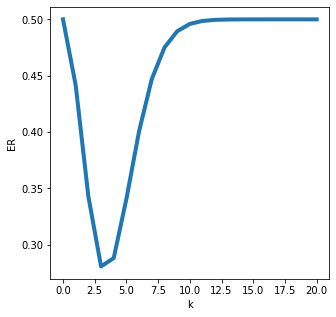

In [18]:
ER = (PFA+(1-PD))/2

fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(k,ER,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('k')         # label for x-axis
plt.ylabel('ER')      # label for y-axis
plt.show()  

Showing the error rate is minimized when the threshold is taken to be $k_{\rm th} =3$, right between the two means $\nu_0 = 2$ and $\nu_1 = 4$.

What happens as we increase the number of neurons? Detection improves. As discussed in lecture, when decoding from $N$ neurons, this is an if we are sampling from a Poisson process with rate $N\nu_0$ or $N \nu_1$:
$$
P(k_{\Sigma}|s_1) = \frac{(N\nu_1)^{k_{\Sigma}}}{(k_{\Sigma})!} {\rm e}^{- N\nu_1}, \ \ \ \ \ \ P(k_{\Sigma}|s_0) = \frac{(N\nu_0)^{k_{\Sigma}}}{(k_{\Sigma})!} {\rm e}^{- N \nu_0},
$$
which leads to much peakier distributions, which are much better separated, and so can be better discriminated.

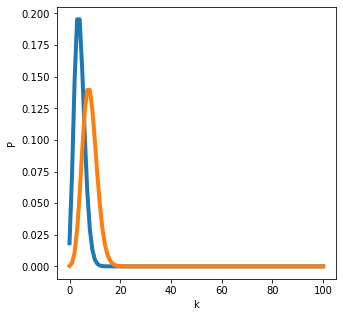

In [31]:
N = 2   # this is the number of neurons to be decoded from 

k = list(range(0,101))

P0N = np.zeros(101)
P1N = np.zeros(101)
for j in np.arange(100):
    P0N[j] = (N*nu0)**j*np.exp(-N*nu0)/math.factorial(j)
    P1N[j] = (N*nu1)**j*np.exp(-N*nu1)/math.factorial(j)
    
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(k,P0N,linewidth=4.0)  # plot command with vectors as arguments
plt.plot(k,P1N,linewidth=4.0)
plt.xlabel('k')         # label for x-axis
plt.ylabel('P')      # label for y-axis
plt.show()    


which ultimately will lead to a steeper ROC curve.

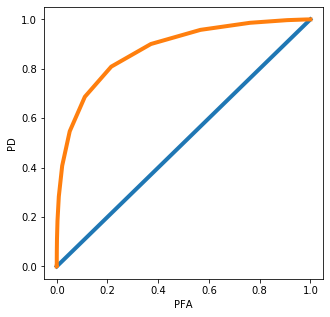

In [32]:
PFAN = np.zeros(101)
PDN = np.zeros(101)
for j in np.arange(100):
    for m in range(j,100):
        PFAN[j] = PFAN[j]+P0N[m]
        PDN[j] = PDN[j]+P1N[m]
        
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot([0,1],[0,1],linewidth=4.0)
plt.plot(PFAN,PDN,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('PFA')         # label for x-axis
plt.ylabel('PD')      # label for y-axis
plt.show()  